<a href="https://colab.research.google.com/github/divyanshi005/stockPredictor/blob/main/stockpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

In [ ]:
stockdata=yf.download('DAC',start='2014-02-21',end='2024-07-21')
stockdata

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-21,86.800003,90.440002,86.379997,88.199997,77.498634,1179
2014-02-24,88.339996,90.440002,86.660004,89.599998,78.728767,2021
2014-02-25,89.599998,90.160004,86.660004,88.480003,77.744675,1571
2014-02-26,89.320000,89.739998,86.800003,89.040001,78.236725,1600
2014-02-27,88.199997,89.320000,85.120003,87.360001,76.760551,2164
...,...,...,...,...,...,...
2024-07-15,87.389999,88.699997,87.389999,87.599998,87.599998,73300
2024-07-16,87.889999,88.500000,87.260002,88.110001,88.110001,51900
2024-07-17,87.739998,88.449997,86.769997,87.199997,87.199997,79500


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [ ]:
scaleddata=scaler.fit_transform(stockdata["Close"].values.reshape(-1,1))

In [ ]:
#making data set :
#sequential data
import numpy as np

In [ ]:
def create_dataset(data,timne_step):
  X,y=[],[]
  for i in range(len(data)-time_step-1):
    X.append(data[i:(i+time_step),0])
    y.append(data[i+time_step,0])

  return np.array(X),np.array(y)


In [ ]:
time_step=100

X,y=create_dataset(scaleddata,time_step)

In [ ]:
#training set and testing set:
train_size=0.8 # first 80% is training data rest 20 is testing


In [ ]:
X_train,x_test=X[:int(X.shape[0]*train_size)],X[int(X.shape[0]*train_size):]
y_train,y_test=y[:int(y.shape[0]*train_size)],y[int(y.shape[0]*train_size):]


This deep learning model is called:

LSTMs Long Short-Term Memory is a type of RNNs Recurrent Neural Network that can detain long-term dependencies in sequential data.

Before transformers, this was used.
 its easiest.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


model=Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(64))
model.add(Dense(64))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#adam is best to optimize genarally
model.compile(optimizer="adam",loss="mean_squared_error")
#epochs= no. of times the model is going to loop over the dataset
#batch= no.of items putting into model ata time // depends on hardware
model.fit(X_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.0853
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - loss: 0.0020
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.0014
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - loss: 0.0014
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - loss: 0.0012
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - loss: 0.0012
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0012
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step - loss: 0.0012
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.0011
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - loss: 0.0010


In [ ]:
#testing:

test_loss=model.evaluate(x_test,y_test)
test_loss

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 7.8457e-04


0.00056116544874385

In [ ]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [ ]:
original_data=stockdata["Close"].values
predicted_data=np.empty_like(original_data)
predicted_data[:]=np.nan
predicted_data[-len(predictions):]=predictions.reshape(-1)

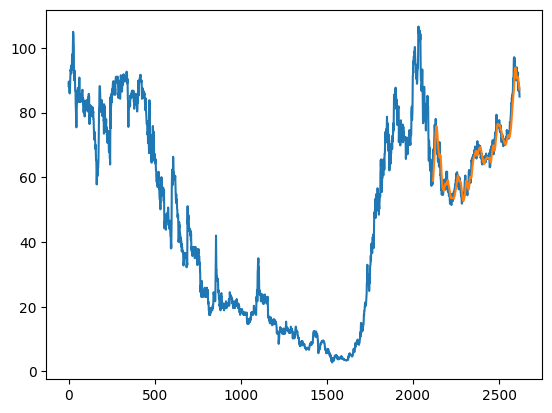

In [ ]:
import matplotlib.pyplot as plt

plt.plot(original_data)
plt.plot(predicted_data)

In [ ]:
new_predictions=model.predict(x_test[-200:])
new_predictions=scaler.inverse_transform(new_predictions)

predicted_data=np.append(predicted_data,new_predictions)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


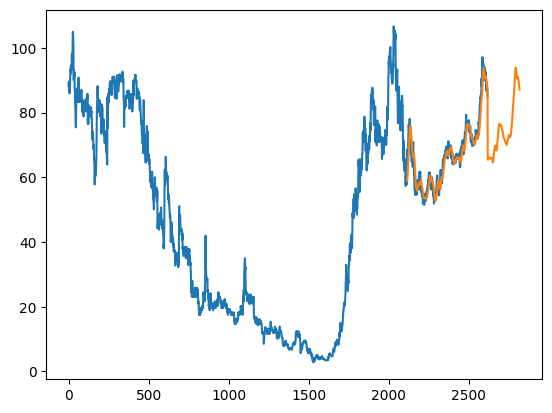

In [ ]:

plt.plot(original_data)
plt.plot(predicted_data)